<a href="https://colab.research.google.com/github/alangilsanchez/MineriaDeDatos/blob/main/ExamenParcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 9

In [22]:
import pandas as pd
import numpy as np

observados = np.array([3, 7, 5, 10])
predichos = np.array([2, 8, 4, 9])

In [23]:
#Calcula los errores
errores = observados - predichos

In [24]:
# Eleva los errores al cuadrado
errores_cuadrados = errores**2

In [25]:
#Calcular el promedio de los cuadrados (MSE)
mse = np.mean(errores_cuadrados)

In [26]:
# Calcula la raíz cuadrada (RMSE)
rmse = np.sqrt(mse)

print(f"Los errores son: {errores}")
print(f"El MSE es: {mse}")
print(f"El RMSE final es: {rmse}")

Los errores son: [ 1 -1  1  1]
El MSE es: 1.0
El RMSE final es: 1.0


Pregunta 10

In [27]:
p_a = 0.60  # Probabilidad de que la pieza sea de la máquina A
p_b = 0.40  # Probabilidad de que la pieza sea de la máquina B

p_defectuosa_dado_a = 0.02  # Probabilidad de defecto en A
p_defectuosa_dado_b = 0.05  # Probabilidad de defecto en B



In [28]:
# Calcula la Probabilidad Total de que una pieza sea defectuosa P(D)
# P(D) = P(A)*P(D|A) + P(B)*P(D|B)
p_defectuosa_total = (p_a * p_defectuosa_dado_a) + (p_b * p_defectuosa_dado_b)



In [29]:
# P(B|D)
p_b_dado_defectuosa = (p_b * p_defectuosa_dado_b) / p_defectuosa_total

print(f"Probabilidad de que sea de la máquina B: {p_b_dado_defectuosa}")

Probabilidad de que sea de la máquina B: 0.6250000000000001


Pregunta 13

In [30]:
# Establece una semilla para reproducibilidad
np.random.seed(42)


# 1. Crea una lista de matrículas de estudiantes
student_ids = [f'{i:06d}' for i in range(172120, 172120 + 20)]


# 2. Asigna 10 estudiantes al grupo 'Café' y 10 al grupo 'Agua'
groups = ['Café'] * 10 + ['Agua'] * 10
np.random.shuffle(groups)


# 3. Simula calificacionen de examenes para el grupo café
# Mean=70, Std=5, asegurate de que los valores estén entre (50-100)
coffee_scores = np.random.normal(loc=70, scale=5, size=10).round(0)
coffee_scores = np.clip(coffee_scores, 50, 100).astype(int)


# 4. Simula calificaciones de examen para el grupo de 'Agua'
# Mean=75, Std=5, asegurate de que los valores estén entre (50-100)
water_scores = np.random.normal(loc=75, scale=5, size=10).round(0)
water_scores = np.clip(water_scores, 50, 100).astype(int)


# Combina los valores basado en el grupo
exam_scores = []
coffee_idx = 0
water_idx = 0
for group in groups:
    if group == 'Café':
        exam_scores.append(coffee_scores[coffee_idx])
        coffee_idx += 1
    else:
        exam_scores.append(water_scores[water_idx])
        water_idx += 1


# 5. Combina en un DataFrame de Pandas
df_students = pd.DataFrame({
    'Matrícula': student_ids,
    'Grupo': groups,
    'Calificaciones': exam_scores
})


print("Datos simulados:")
print(df_students.head())

Datos simulados:
  Matrícula Grupo  Calificaciones
0    172120  Café              77
1    172121  Agua              77
2    172122  Agua              79
3    172123  Café              78
4    172124  Café              58


Calcula la media (promedio) de los estudiantes que consumen agua

In [31]:
media_agua = df_students[df_students['Grupo'] == 'Agua']['Calificaciones'].mean()

print(f"La media de calificaciones del grupo Agua es: {media_agua}")

La media de calificaciones del grupo Agua es: 74.9


Calcula la media (promedio) de los estudiantes que consumen café

In [32]:
media_cafe = df_students[df_students['Grupo'] == 'Café']['Calificaciones'].mean()

print(f"La media de calificaciones del grupo Café es: {media_cafe}")

La media de calificaciones del grupo Café es: 70.6


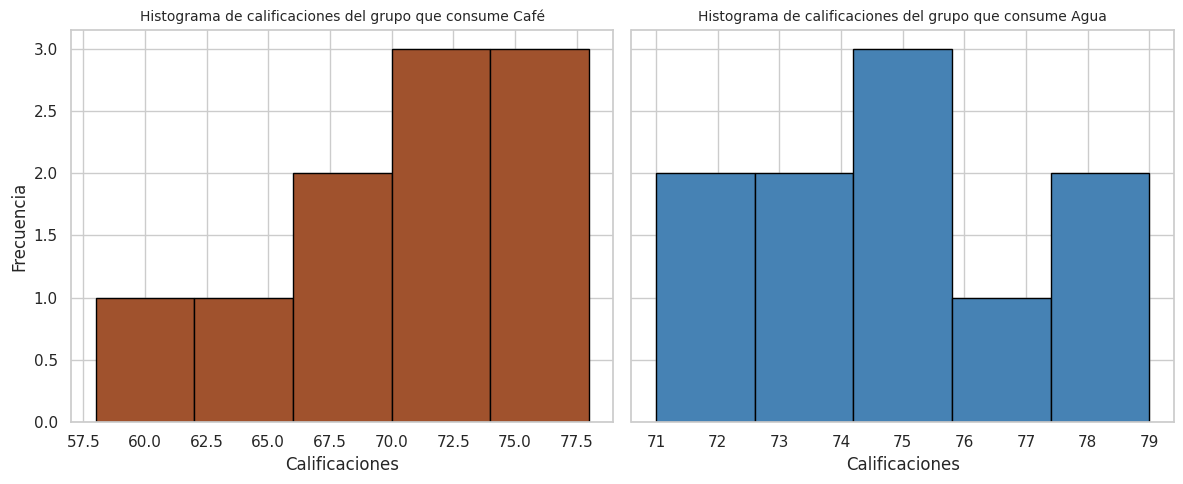

In [33]:
import matplotlib.pyplot as plt

# Crear la figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma para el grupo Café
ax1.hist(df_students[df_students['Grupo'] == 'Café']['Calificaciones'],
         bins=5, color='#A0522D', edgecolor='black')
ax1.set_title('Histograma de calificaciones del grupo que consume Café', fontsize=10)
ax1.set_xlabel('Calificaciones')
ax1.set_ylabel('Frecuencia')

# Histograma para el grupo Agua
ax2.hist(df_students[df_students['Grupo'] == 'Agua']['Calificaciones'],
         bins=5, color='#4682B4', edgecolor='black')
ax2.set_title('Histograma de calificaciones del grupo que consume Agua', fontsize=10)
ax2.set_xlabel('Calificaciones')

plt.tight_layout()
plt.show()

Pregunta 19

In [34]:
# Crea el DataFrame con los datos
datos_examen = {
    'Aprobó': [45, 20],
    'Reprobó': [5, 30]
}
df_examen = pd.DataFrame(datos_examen, index=['Tomó el curso', 'No tomó el curso'])

In [35]:
# Estudiantes que aprobaron Y tomaron el curso (Intersección A y B)
aprobó_y_curso = df_examen.at['Tomó el curso', 'Aprobó']

In [36]:
# Total de estudiantes que tomaron el curso
total_tomó_curso = df_examen.loc['Tomó el curso'].sum()

In [37]:
#Calcula la probabilidad condicional
prob_condicional = aprobó_y_curso / total_tomó_curso

print(f"Resultado: {prob_condicional}")

Resultado: 0.9


Pregunta 20

In [38]:
prob_simple_aprobar = df_examen['Aprobó'].sum() / df_examen.values.sum()

print(f"La probabilidad simple de aprobar es: {prob_simple_aprobar}")

La probabilidad simple de aprobar es: 0.65
